In [1]:
import pandas as pd

In [2]:
df3_WS1T = pd.read_csv("engineering_OF_segment1_workflowS4_has_duration.csv",engine='python')

In [3]:
df3_WS1T.head(n=1)

,CASE_ID,WRKFLW_TSK_MAP_GROUPED,WRKFLW_TSK_MAP_DETAILED,PATH_CRDATETIME,ITEM_CRUSER,WRKFLW_ORG_TYPE_CRUSER,STATUS_ORDER,LATEST_STATUS,WRKFLW_PROCESS,QUERY_PART,...,SPK_CAT_TYPE_CD,BROAD_COURSE_LEVEL,DEGREETYPE,LIABILITY_CATEGORY_CD_RECODE,ORIG_LIABILITY_CATEGORY_CD_RECODE,OFFER_RELEASED_FG,OFFER_OUTCOME_CD,OFFER_CONDITIONS,time_used_str,time_used_second
0,1140679|518493|795102,Release Offer,Release Offer,25/10/2019 11:48:16,KRIT,Faculty,4,N,3b. Offer stage,Part 2 - Application Line ID Workflow,...,MCW,HDCW,Full Degree,OF,OF,Y,NaN,Y,0 days 0 hours 0 minutes 37 seconds,37.0


In [4]:
#store unique WRKFLW_TSK_MAP_DETAILED
WRKFLW_TSK_MAP_DETAILED_list = df3_WS1T['WRKFLW_TSK_MAP_DETAILED'].tolist()
unique_WRKFLW_TSK_MAP_DETAILED_list = set(WRKFLW_TSK_MAP_DETAILED_list)
len(unique_WRKFLW_TSK_MAP_DETAILED_list)
unique_WRKFLW_TSK_MAP_DETAILED_list

{'AR - Created - CONDITIONAL Acceptance agreement (International)',
 'AR - Created - Overseas Student Health Cover details',
 'AR - Not Satisfied - English language proficiency',
 'AR - Reviewed - Appointment of authorised representative',
 'AR - Reviewed - Further information (1)',
 'AR - Satisfied - Academic results for prior tertiary studies',
 'AR - Satisfied - Advanced Standing',
 'AR - Satisfied - Appointment of authorised representative',
 'AR - Satisfied - CONDITIONAL Acceptance agreement (International)',
 'AR - Satisfied - Current enrolment at the University of Melbourne',
 'AR - Satisfied - Curriculum Vitae',
 'AR - Satisfied - English language proficiency',
 'AR - Satisfied - Further information (1)',
 'AR - Satisfied - Further information (2)',
 'AR - Satisfied - Official syllabus or subject descriptions (in English)',
 'AR - Satisfied - Overseas Student Health Cover details',
 'AR - Satisfied - Sponsorship arrangements',
 'Acacdemic - Assessment Decision - No Decision',
 

In [5]:
#store unique CASE_ID
ID_list = df3_WS1T['CASE_ID'].tolist()
unique_ID_list = set(ID_list)
len(unique_ID_list)

77

In [6]:
#create dataframe columns->unique_WRKFLW_TSK_MAP_DETAILED row->unique_ID
df = pd.DataFrame(columns = unique_WRKFLW_TSK_MAP_DETAILED_list, index = unique_ID_list )
df

,AR - Created - Overseas Student Health Cover details,Assessment Decision - Qualified,AR - Satisfied - English language proficiency,AR - Reviewed - Further information (1),Defer,AR - Satisfied - Sponsorship arrangements,AR - Not Satisfied - English language proficiency,OC - Satisfied - Overseas Student Health Cover details,Decline,AR - Satisfied - Official syllabus or subject descriptions (in English),...,AR - Satisfied - Further information (2),Release Triage Hold,Acacdemic - Assessment Decision - No Decision,OC - Created - English language requirements,AR - Created - CONDITIONAL Acceptance agreement (International),AR - Satisfied - Appointment of authorised representative,AR - Satisfied - Overseas Student Health Cover details,AR - Satisfied - CONDITIONAL Acceptance agreement (International),AR - Satisfied - Current enrolment at the University of Melbourne,AR - Satisfied - Further information (1)
1129844|504428|774123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1059535|414069|641840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
936774|549491|840831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1027189|368434|574922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1100870|468500|719548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126520|499350|766743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1160013|547868|838635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1056808|409506|733846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1143164|521947|800205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#sotre id as key and workflow detail of the id as value into dictionary
from collections import defaultdict
ID_WRKFLW_dict = defaultdict(list)
for i, j in zip(df3_WS1T.CASE_ID,df3_WS1T.WRKFLW_TSK_MAP_DETAILED):
    ID_WRKFLW_dict[i].append(j)
len(ID_WRKFLW_dict)

77

In [8]:
#change the value
for key in ID_WRKFLW_dict.keys():
    for process in ID_WRKFLW_dict[key]:
            df.loc[key, process] = 1
zero_one_table = df.fillna(0)
zero_one_table

,AR - Created - Overseas Student Health Cover details,Assessment Decision - Qualified,AR - Satisfied - English language proficiency,AR - Reviewed - Further information (1),Defer,AR - Satisfied - Sponsorship arrangements,AR - Not Satisfied - English language proficiency,OC - Satisfied - Overseas Student Health Cover details,Decline,AR - Satisfied - Official syllabus or subject descriptions (in English),...,AR - Satisfied - Further information (2),Release Triage Hold,Acacdemic - Assessment Decision - No Decision,OC - Created - English language requirements,AR - Created - CONDITIONAL Acceptance agreement (International),AR - Satisfied - Appointment of authorised representative,AR - Satisfied - Overseas Student Health Cover details,AR - Satisfied - CONDITIONAL Acceptance agreement (International),AR - Satisfied - Current enrolment at the University of Melbourne,AR - Satisfied - Further information (1)
1129844|504428|774123,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1059535|414069|641840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
936774|549491|840831,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1027189|368434|574922,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1100870|468500|719548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126520|499350|766743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1160013|547868|838635,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1056808|409506|733846,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1143164|521947|800205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

features= list(unique_WRKFLW_TSK_MAP_DETAILED_list)
print(len(features))
features.remove('Accept')
features.remove('Defer')
print(len(features))

X=zero_one_table[features]
y=zero_one_table ['Accept'] # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 70% training and 30% test

37
35


In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5,
                             random_state = 0)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

In [11]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [12]:
print(confusion_matrix(y_test, clf_pred))
print(classification_report(y_test, clf_pred))

[[10  0]
 [ 5  5]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.50      0.67        10

    accuracy                           0.75        20
   macro avg       0.83      0.75      0.73        20
weighted avg       0.83      0.75      0.73        20



In [13]:
# DOT data
from IPython.display import Image
from sklearn import tree
import pydotplus
fn=features
cn=['0', '1']
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

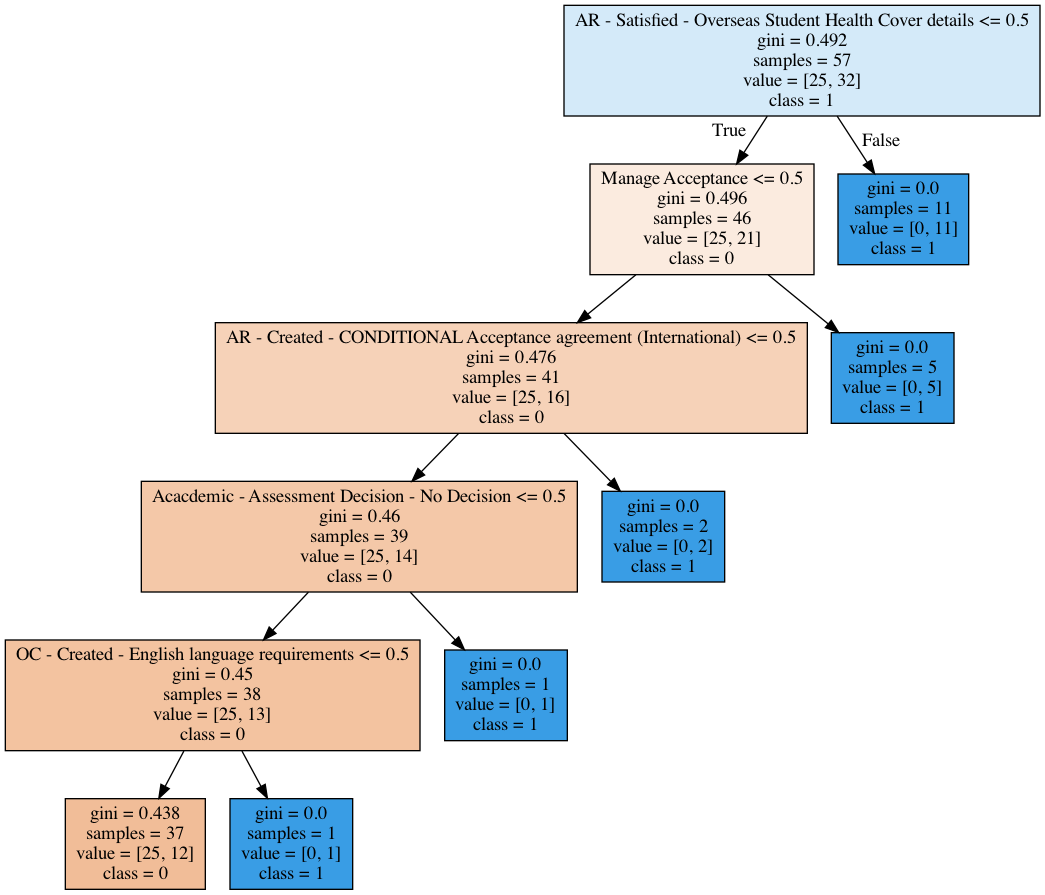

In [14]:
# Show graph
Image(graph.create_png())

In [15]:
# Create PNG
graph.write_png("engineering_OF_segment1_workflowS4_decisiontree.png")









True

In [16]:
zero_one_table['Accept'].value_counts()

1    42
0    35
Name: Accept, dtype: int64

In [17]:
from sklearn.utils import resample

# Separate majority and minority classes
zero_one_table_majority = df[zero_one_table['Accept']==1]
zero_one_table_minority = df[zero_one_table['Accept']==0]

# Upsample minority class
df_majority_downsampled = resample(zero_one_table_majority,
                                 replace=False,     # sample with replacement
                                 n_samples=35,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_downsampled = pd.concat([zero_one_table_minority, df_majority_downsampled])

# Display new class counts
df_downsampled = df_downsampled.fillna(0)
df_downsampled['Accept'].value_counts()

1    35
0    35
Name: Accept, dtype: int64

In [18]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df_downsampled[features]
y=df_downsampled ['Accept'] # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 70% training and 30% test

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 8,
                             random_state = 0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7777777777777778


In [20]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8 1]
 [3 6]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.86      0.67      0.75         9

    accuracy                           0.78        18
   macro avg       0.79      0.78      0.77        18
weighted avg       0.79      0.78      0.77        18



In [21]:
# DOT data
from IPython.display import Image
from sklearn import tree
import pydotplus
fn=features
cn=['0', '1']
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

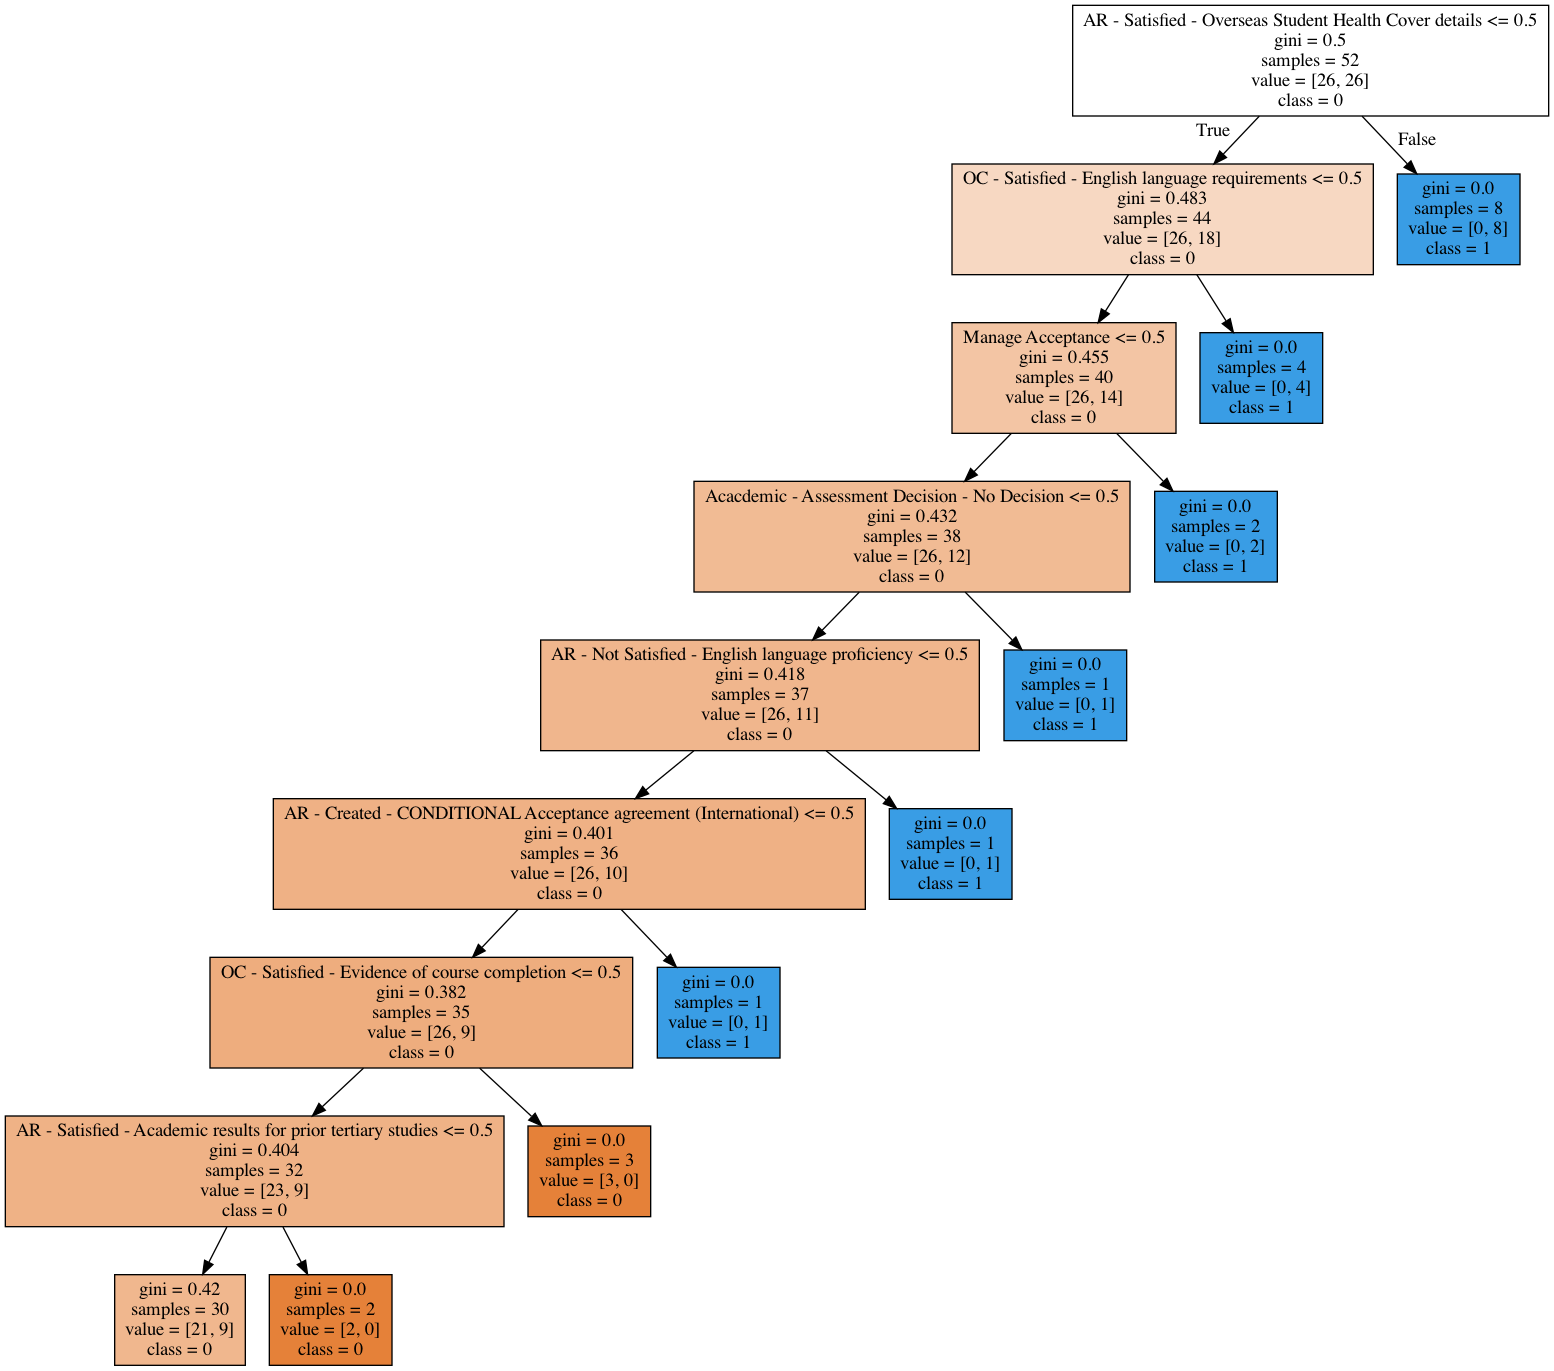

In [22]:
# Show graph
Image(graph.create_png())

In [23]:
# Create PNG
graph.write_png("engineering_OF_segment1_workflowS4_decisiontree_downsampled.png")

True